<a href="https://colab.research.google.com/github/huyhoang1996vn/my-ml/blob/master/sklearn_linear_regression_single_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.datacamp.com/tutorial/sklearn-linear-regression

<!-- https://www.datacamp.com/tutorial/sklearn-linear-regression -->

In [2]:
# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
# Convert to DataFrame for easier handling
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


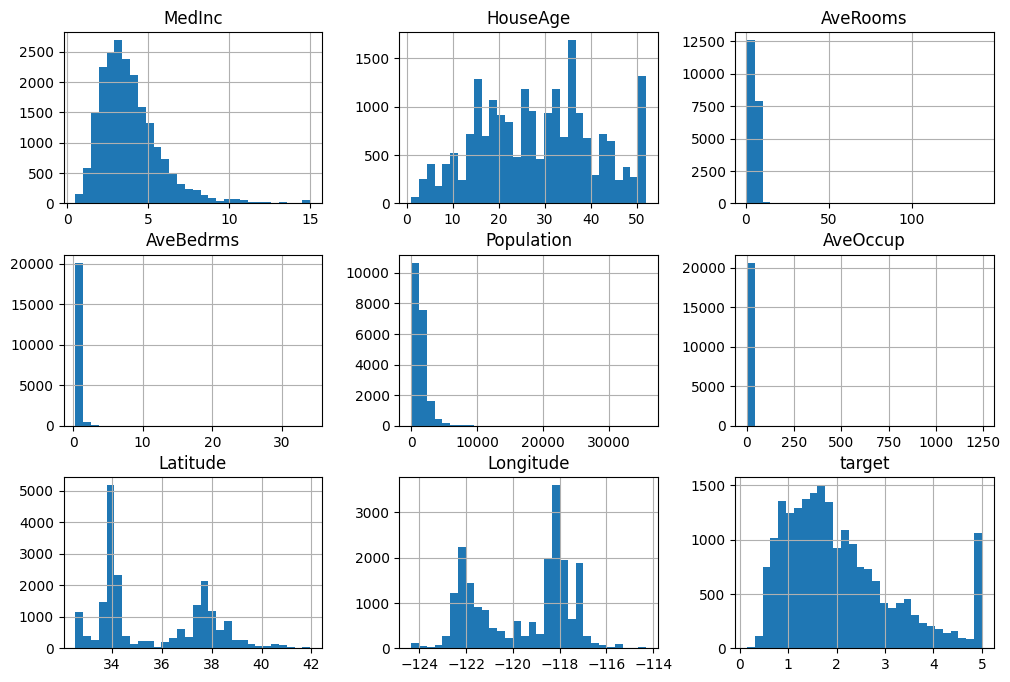

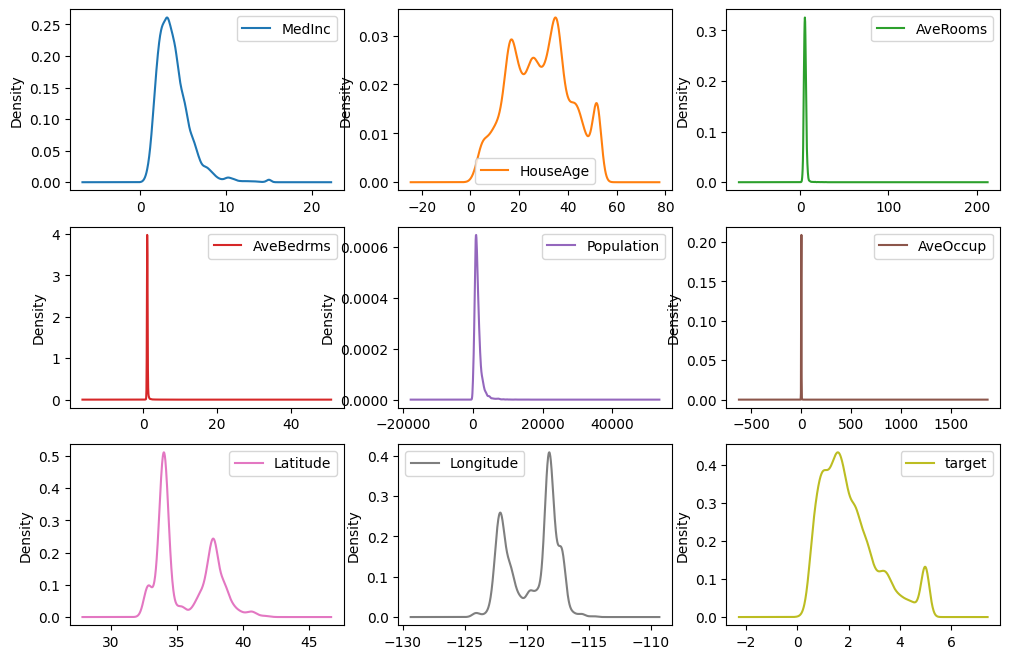

In [4]:
housing_df.hist(figsize=(12, 8), bins=30)
housing_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
plt.show()

In [ ]:
# Import train_test_split.
from sklearn.model_selection import train_test_split


# Create features X and target y.
room_feature = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]
target = housing.target  # Median house value in $100,000s




In [ ]:
room_feature_train, room_feature_test, target_train, target_test = train_test_split(room_feature, target, test_size=0.2, random_state=42)




In [ ]:
room_feature_train

,AveRooms
14196,5.017657
8267,4.473545
17445,5.645833
14265,4.002817
2271,6.268421
...,...
11284,6.129032
11964,6.868597
5390,3.986717
860,6.395349


In [ ]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
room_feature_train_scaled = scaler.fit_transform(room_feature_train)

In [ ]:
room_feature_train_scaled

array([[-0.17491646],
       [-0.40283542],
       [ 0.08821601],
       ...,
       [-0.60675918],
       [ 0.40217517],
       [-0.85144571]])

In [ ]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()

In [ ]:
model.fit(room_feature_train_scaled, target_train)

LinearRegression()

In [ ]:
# Fit and transform training data.
room_feature_test_scaled = scaler.transform(room_feature_test)

In [ ]:
target_predict = model.predict(room_feature_test_scaled)
target_predict

array([1.97653709, 2.04156313, 1.96003112, ..., 2.21029436, 2.06072485,
       1.96092798])

In [ ]:
model2 = LinearRegression()
model2.fit(room_feature_train, target_train)
target_predict2 = model2.predict(room_feature_test)

r2=r2_score(target_test, target_predict2)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(target_test, target_predict2)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.0138
Mean squared error: 1.2923
Root mean squared error: 1.1368


In [ ]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r2=r2_score(target_test, target_predict)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(target_test, target_predict)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.0138
Mean squared error: 1.2923
Root mean squared error: 1.1368


In [ ]:
import numpy as np

# Tính phạm vi của y thực tế (target_test)
y_range = np.max(target_test) - np.min(target_test)
# Tính ngưỡng 5-10% của phạm vi
good_threshold = 0.05 * y_range
acceptable_threshold = 0.10 * y_range

print(f"Phạm vi y: {y_range}")
print(f"RMSE tốt (5% phạm vi): < {good_threshold}")
print(f"RMSE chấp nhận được (10% phạm vi): < {acceptable_threshold}")
print(f"RMSE của bạn: {rmse}")

Phạm vi y: 4.85002
RMSE tốt (5% phạm vi): < 0.242501
RMSE chấp nhận được (10% phạm vi): < 0.485002
RMSE của bạn: 1.136807566864652


In [ ]:
print("Intercept:", model.intercept_)


Intercept: 2.071946937378876


In [ ]:
model.coef_

array([0.18323882])

In [ ]:

# Since the model was trained on a single feature ('AveRooms'), we'll use that for the coefficient display
coeff_df = pd.DataFrame({"Feature": ['AveRooms'], "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)


Feature Coefficients:
     Feature  Coefficient
0  AveRooms     0.183239
